In [9]:
import sqlite3 as sq3
import pandas.io.sql as pds
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()
# import kagglehub

In [10]:
#  path = 'data/classic_rock.db'
#  con = sq3.Connection(path)
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

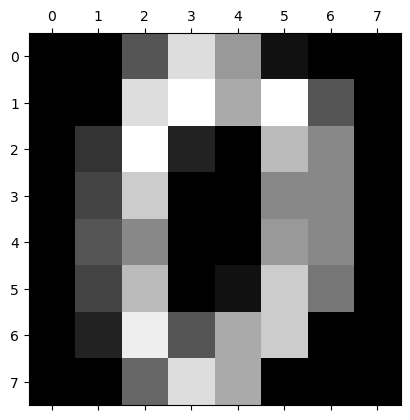

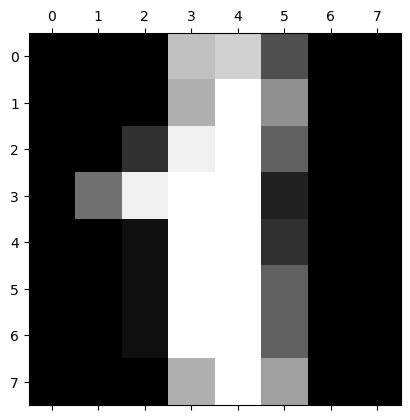

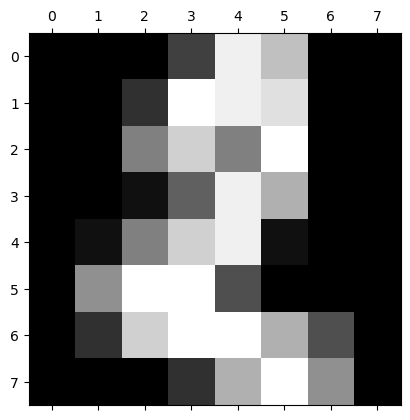

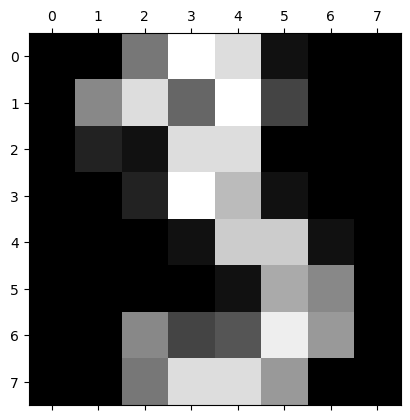

In [11]:
# query = '''
# SELECT *
# FROM rock_songs;
# '''
# observations=pd.read_sql(query, con)
# observations.head()
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])
    

In [15]:
# query='''
# SELECT Artist, Release_year,COUNT (*) All num_songs, AVG(PlayCount) 
#       FROM rock_songs
#       GROUP BY Artist,Release_Year
#       GROUP BY num_songs desc;
# '''
# observations = pds.read_sql(query,con,coerce_float=True,parse_dates)
# observations.head()
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [17]:
digits.data[:5] #Each row is an array of 64 integers : 8*8 matrix 

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [19]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,Y_test=train_test_split(df.drop(['target'],axis='columns'),digits.target,test_size=0.2)

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [29]:
model.score(X_test,Y_test)

0.9722222222222222

In [30]:
y_predicted=model.predict(X_test)

Text(50.722222222222214, 0.5, 'Truth')

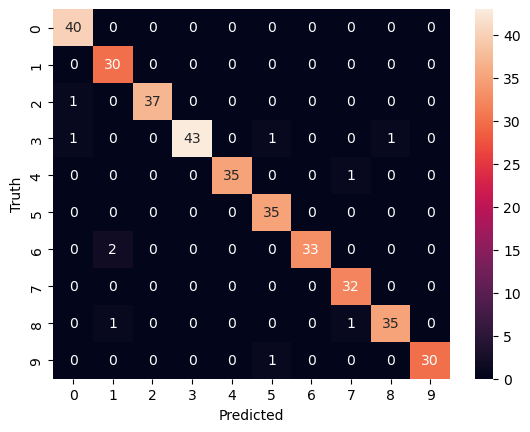

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_predicted)
import seaborn as sb
sb.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [2]:
import pandas as pd
import numpy as np 
data=pd.read_csv('diabetes.csv',usecols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age',
            'Outcome'])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#No. of unique Labels each variable have
for col in data.columns:
    print(col,':',len(data[col].unique()),' labels')

Pregnancies : 17  labels
Glucose : 136  labels
BloodPressure : 47  labels
SkinThickness : 51  labels
Insulin : 186  labels
BMI : 248  labels
DiabetesPedigreeFunction : 517  labels
Age : 52  labels
Outcome : 2  labels


In [4]:
#one hot encoding of these variables lead to how many columns:
pd.get_dummies(data,drop_first=True).shape

(768, 9)

In [9]:
#top 10 most frequent categories for the variable X2
data.Glucose.value_counts().sort_values(ascending=False).head(20)

99     17
100    17
111    14
129    14
125    14
106    14
112    13
108    13
95     13
105    13
102    13
122    12
109    12
120    11
114    11
119    11
128    11
117    11
90     11
124    11
Name: Glucose, dtype: int64

In [11]:
top_10 = [x for x in data.Glucose.value_counts().sort_values(ascending=False).head(10).index]
top_10

[99, 100, 111, 129, 125, 106, 112, 108, 95, 105]